#Liên kết drive và import các thư viện cần thiết

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd
from sklearn import svm, metrics
from PIL import Image

# Đọc dữ liệu từ drive

In [ ]:
# Lấy đường dẫn đến các file csv
link_X_train = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/X_train_FL.csv'
link_Y_train = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/Y_train_FL.csv'
link_X_vali = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/X_val_FL.csv'
link_Y_vali = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/Y_val_FL.csv'
link_X_test = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/X_test_FL.csv'
link_Y_test = '/content/drive/MyDrive/Data_Final_Project/Save_Data_Vector_IMG/Y_test_FL.csv'

In [ ]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(link_X_train,header=None).to_numpy()
Y_train = pd.read_csv(link_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(link_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(link_Y_vali,header=None).to_numpy()
X_test = pd.read_csv(link_X_test,header=None).to_numpy()
Y_test = pd.read_csv(link_Y_test,header=None).to_numpy()

In [ ]:
# Kích thước dữ liệu
print("Tập train: ", len(X_train),len(Y_train))
print("Tập validation: ", len(X_vali),len(Y_vali))
print("Tập test: ", len(X_test),len(Y_test))

Tập train:  19278 19278
Tập validation:  4863 4863
Tập test:  5384 5384


In [ ]:
labels = os.listdir('/content/drive/MyDrive/Data_Final_Project/data')
labels = sorted(labels)
print(labels)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


#Chỉnh size các khung hiển thị confusion matrix

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,20

#**Train Model**

###**Model Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LG = LogisticRegression(C = 0.1, max_iter=1000)
model_LG.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_LG.sav'
#joblib.dump(model_LG, filename)
model_LG = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_LG.sav')
model_LG

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

	Validation
Accuracy:  0.490643635615875




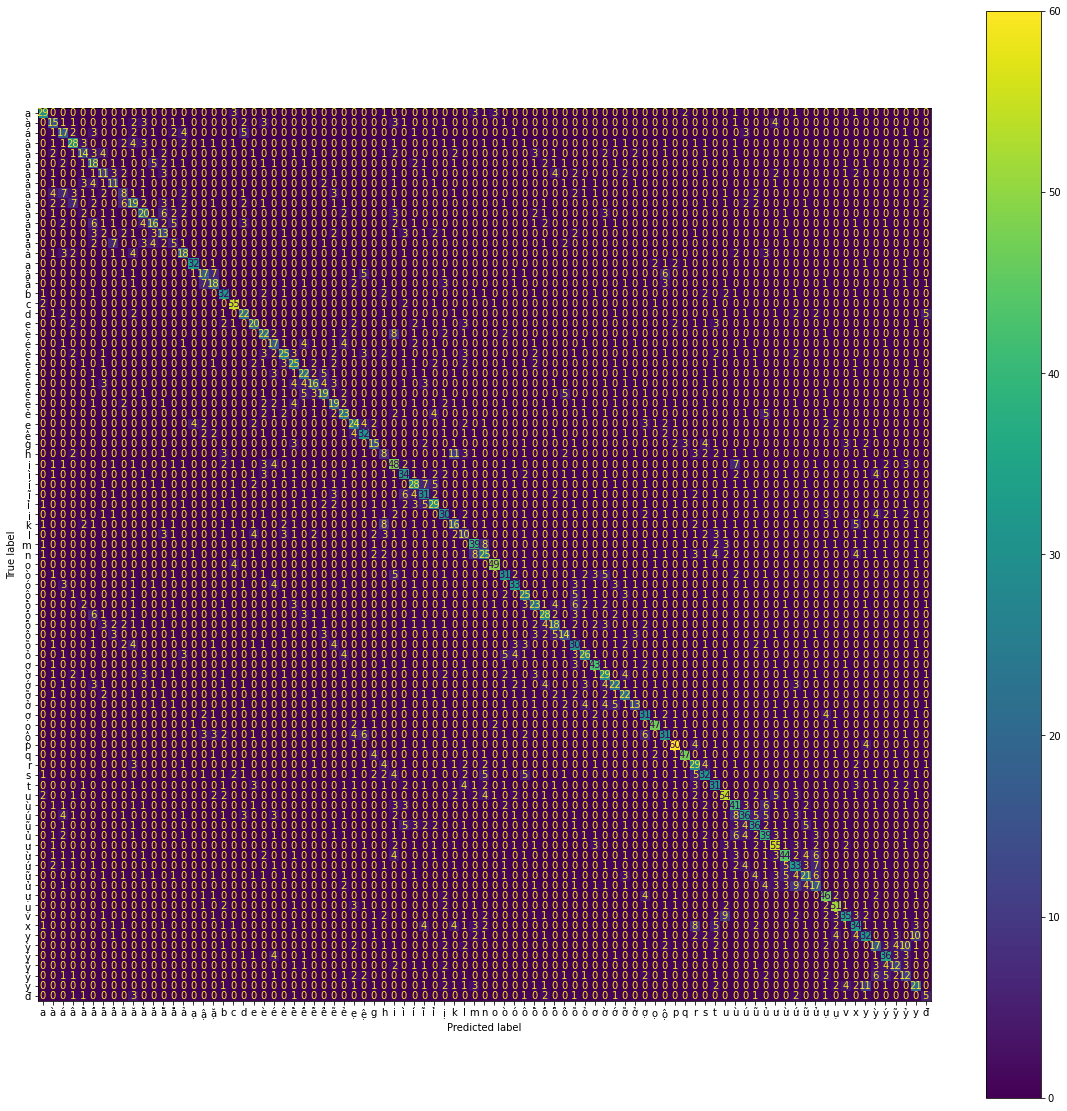

              precision    recall  f1-score   support

           a       0.72      0.64      0.68        45
          à       0.35      0.37      0.36        41
          á       0.30      0.39      0.34        44
          â       0.47      0.45      0.46        62
         ầ       0.42      0.30      0.35        47
         ấ       0.30      0.37      0.33        49
         ẫ       0.29      0.27      0.28        41
         ẩ       0.31      0.37      0.34        30
          ã       0.24      0.18      0.21        44
          ă       0.32      0.30      0.31        64
         ằ       0.43      0.42      0.42        48
         ắ       0.43      0.32      0.37        50
         ẵ       0.30      0.33      0.31        39
         ẳ       0.19      0.18      0.19        28
          ả       0.43      0.49      0.46        37
          ạ       0.82      0.78      0.80        41
         ậ       0.46      0.40      0.42        43
         ặ       0.43    

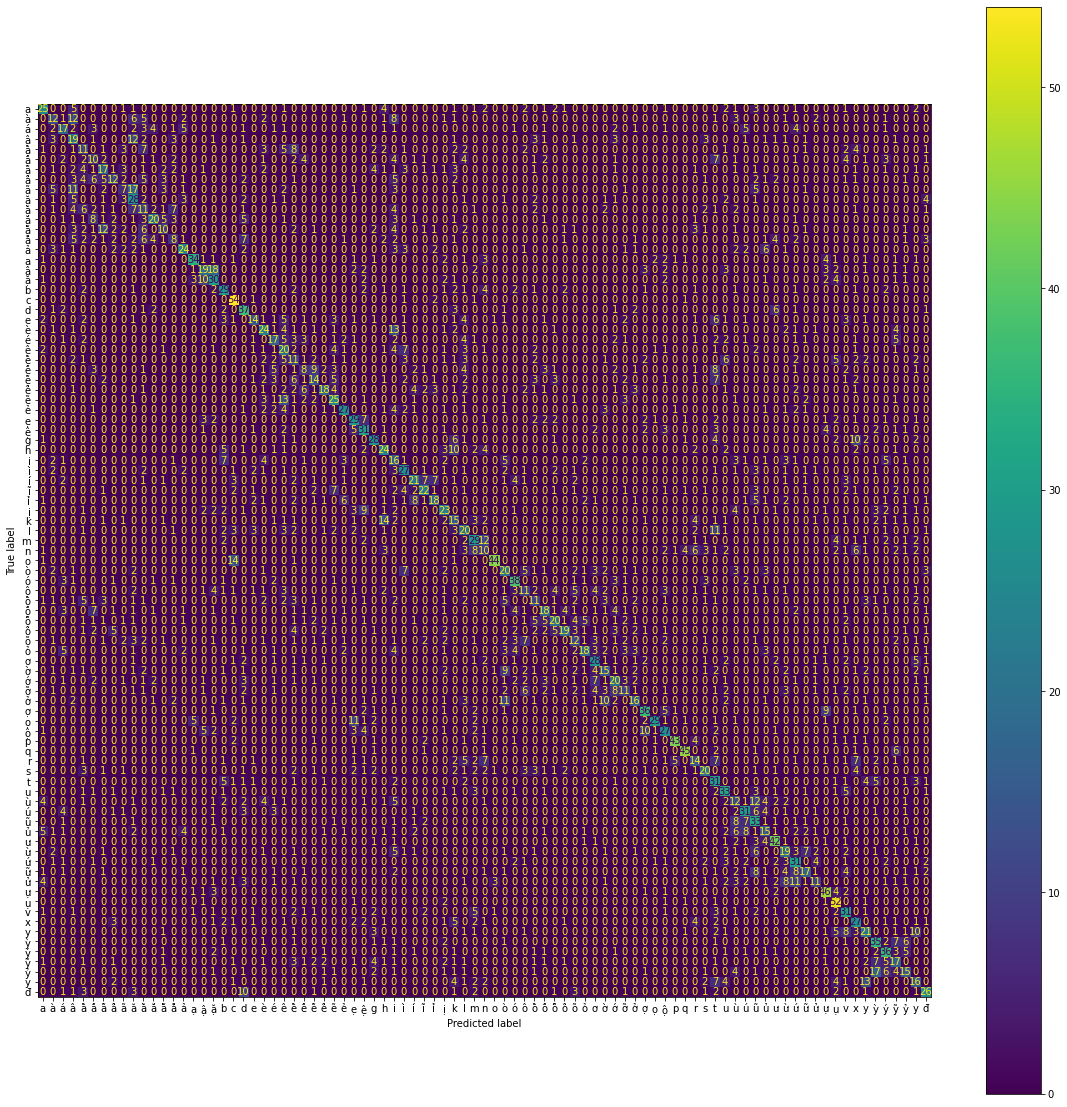

              precision    recall  f1-score   support

           a       0.46      0.42      0.44        60
          à       0.27      0.20      0.23        60
          á       0.35      0.28      0.31        60
          â       0.22      0.32      0.26        60
         ầ       0.19      0.18      0.18        60
         ấ       0.19      0.17      0.18        60
         ẫ       0.31      0.28      0.30        60
         ẩ       0.32      0.20      0.25        60
          ã       0.23      0.12      0.16        60
          ă       0.27      0.47      0.35        60
         ằ       0.17      0.18      0.17        60
         ắ       0.51      0.33      0.40        60
         ẵ       0.30      0.17      0.22        60
         ẳ       0.24      0.13      0.17        60
          ả       0.50      0.40      0.44        60
          ạ       0.74      0.57      0.64        60
         ậ       0.40      0.32      0.36        60
         ặ       0.38    

In [ ]:
y_pred_vali = model_LG.predict(X_vali)
y_pred_test = model_LG.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_LG,X_vali,Y_vali,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(result)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_LG,X_test,Y_test,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(result)


#Model Support Vector Machine(SVM)

> Sử dụng kernel linear



In [ ]:
from sklearn.svm import SVC
model_SVM_linear = SVC(C=1000, kernel = 'linear', gamma=0.001)
model_SVM_linear.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_linear.sav'
#joblib.dump(model_SVM_linear, filename)
model_SVM_linear = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_linear.sav')
model_SVM_linear

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

	Validation
Accuracy:  0.7199259716224553




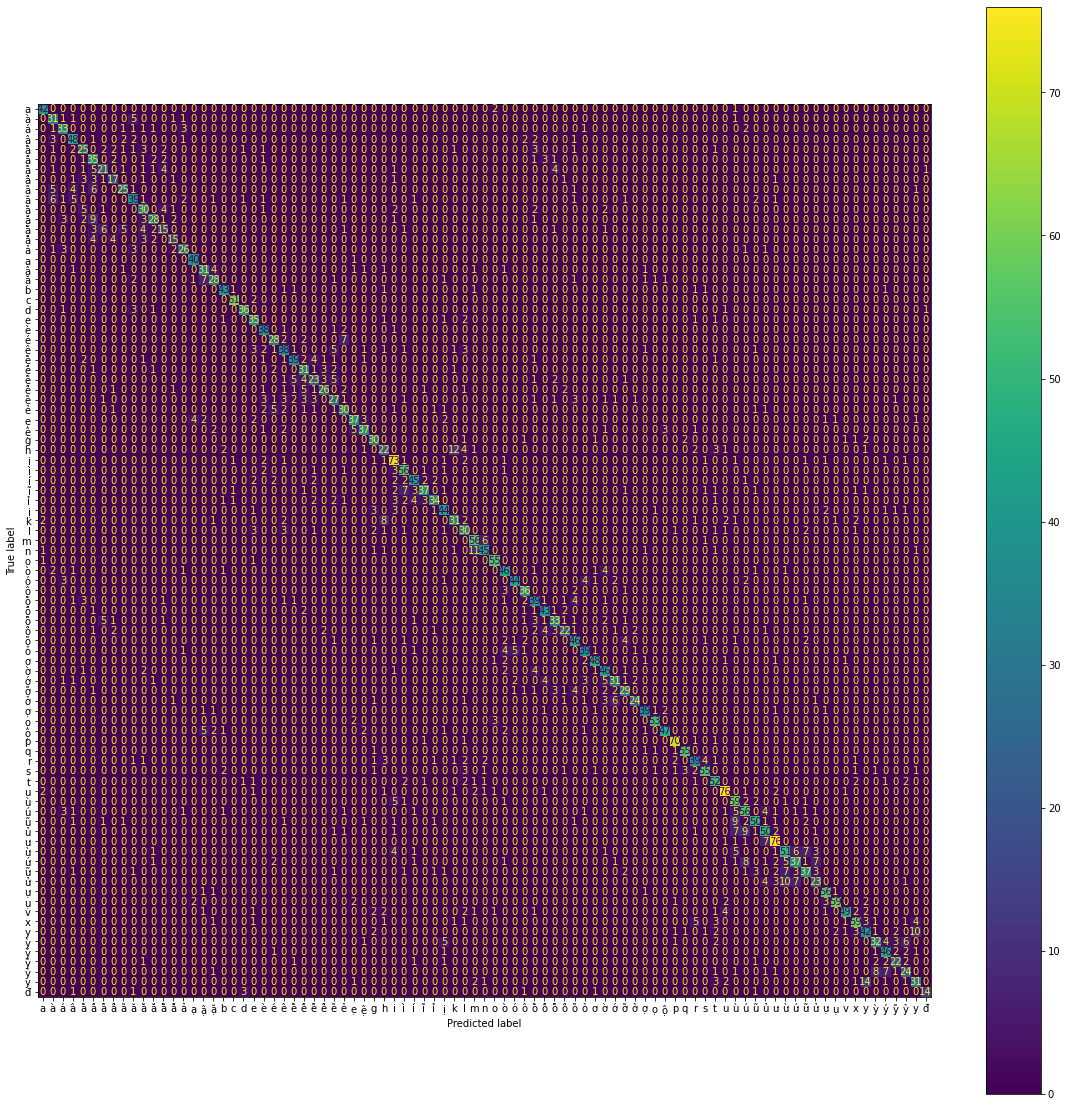

              precision    recall  f1-score   support

           a       0.88      0.93      0.90        45
          à       0.61      0.76      0.67        41
          á       0.67      0.75      0.71        44
          â       0.70      0.77      0.73        62
         ầ       0.57      0.53      0.55        47
         ấ       0.50      0.71      0.59        49
         ẫ       0.55      0.51      0.53        41
         ẩ       0.57      0.57      0.57        30
          ã       0.68      0.57      0.62        44
          ă       0.65      0.61      0.63        64
         ằ       0.57      0.62      0.59        48
         ắ       0.68      0.56      0.62        50
         ẵ       0.50      0.38      0.43        39
         ẳ       0.62      0.54      0.58        28
          ả       0.72      0.70      0.71        37
          ạ       0.85      0.98      0.91        41
         ậ       0.65      0.72      0.68        43
         ặ       0.67    

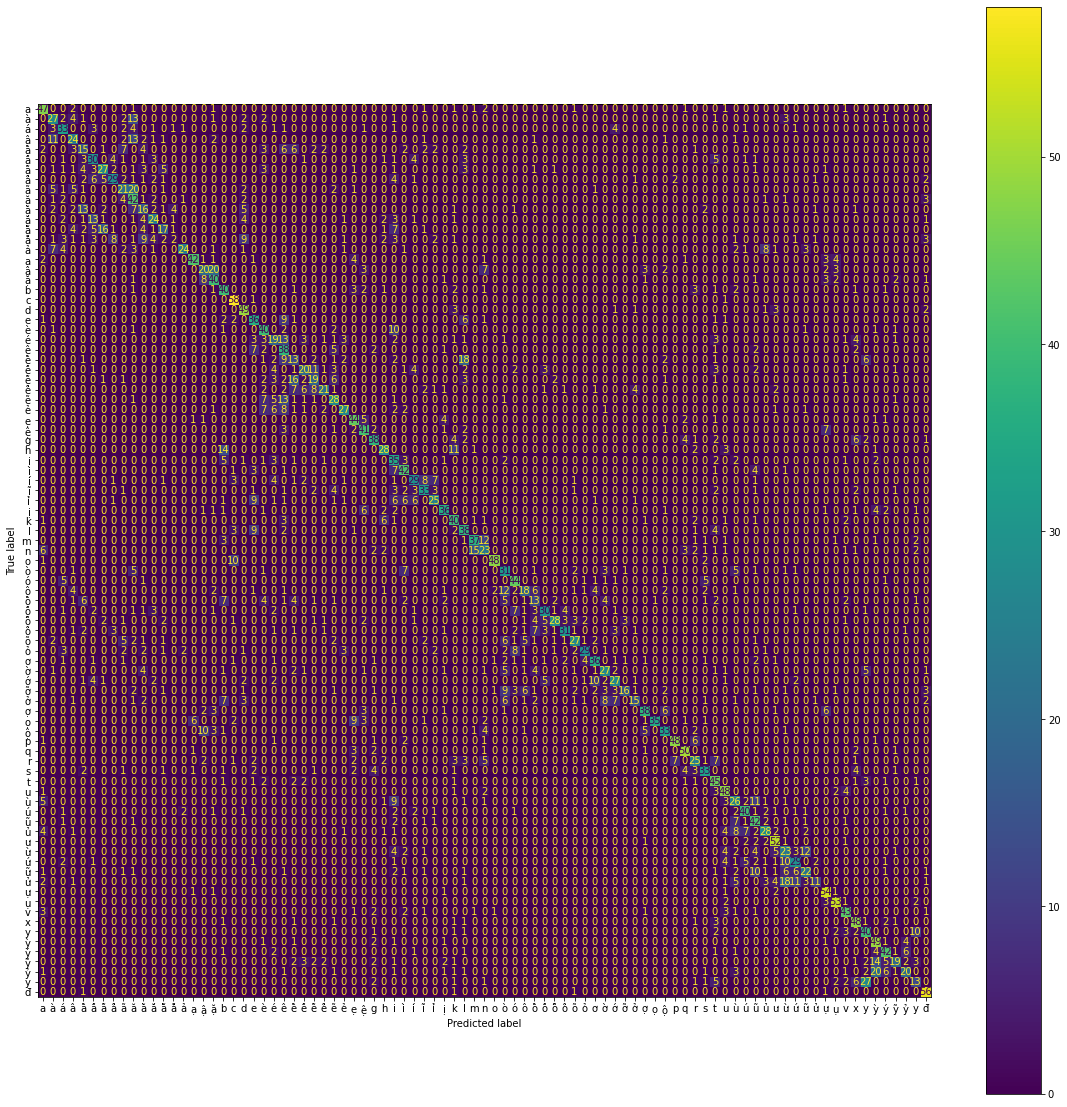

              precision    recall  f1-score   support

           a       0.60      0.78      0.68        60
          à       0.44      0.45      0.44        60
          á       0.52      0.55      0.54        60
          â       0.43      0.40      0.41        60
         ầ       0.27      0.25      0.26        60
         ấ       0.42      0.50      0.45        60
         ẫ       0.48      0.45      0.47        60
         ẩ       0.59      0.48      0.53        60
          ã       0.38      0.35      0.36        60
          ă       0.34      0.70      0.46        60
         ằ       0.29      0.27      0.28        60
         ắ       0.52      0.40      0.45        60
         ẵ       0.49      0.28      0.36        60
         ẳ       0.22      0.03      0.06        60
          ả       0.80      0.40      0.53        60
          ạ       0.81      0.70      0.75        60
         ậ       0.44      0.33      0.38        60
         ặ       0.50    

In [ ]:
y_pred_vali = model_SVM_linear.predict(X_vali)
y_pred_test = model_SVM_linear.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_linear,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_linear,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)


> Sử dụng kernel Polynomial

In [ ]:
from sklearn.svm import SVC
model_SVM_poly = SVC(C=1000, kernel = 'poly', gamma=0.001)
model_SVM_poly.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 #Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_poly.sav'
#joblib.dump(model_SVM_linear, filename)
model_SVM_poly = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_poly.sav')
model_SVM_poly

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

	Validation
Accuracy:  0.7199259716224553




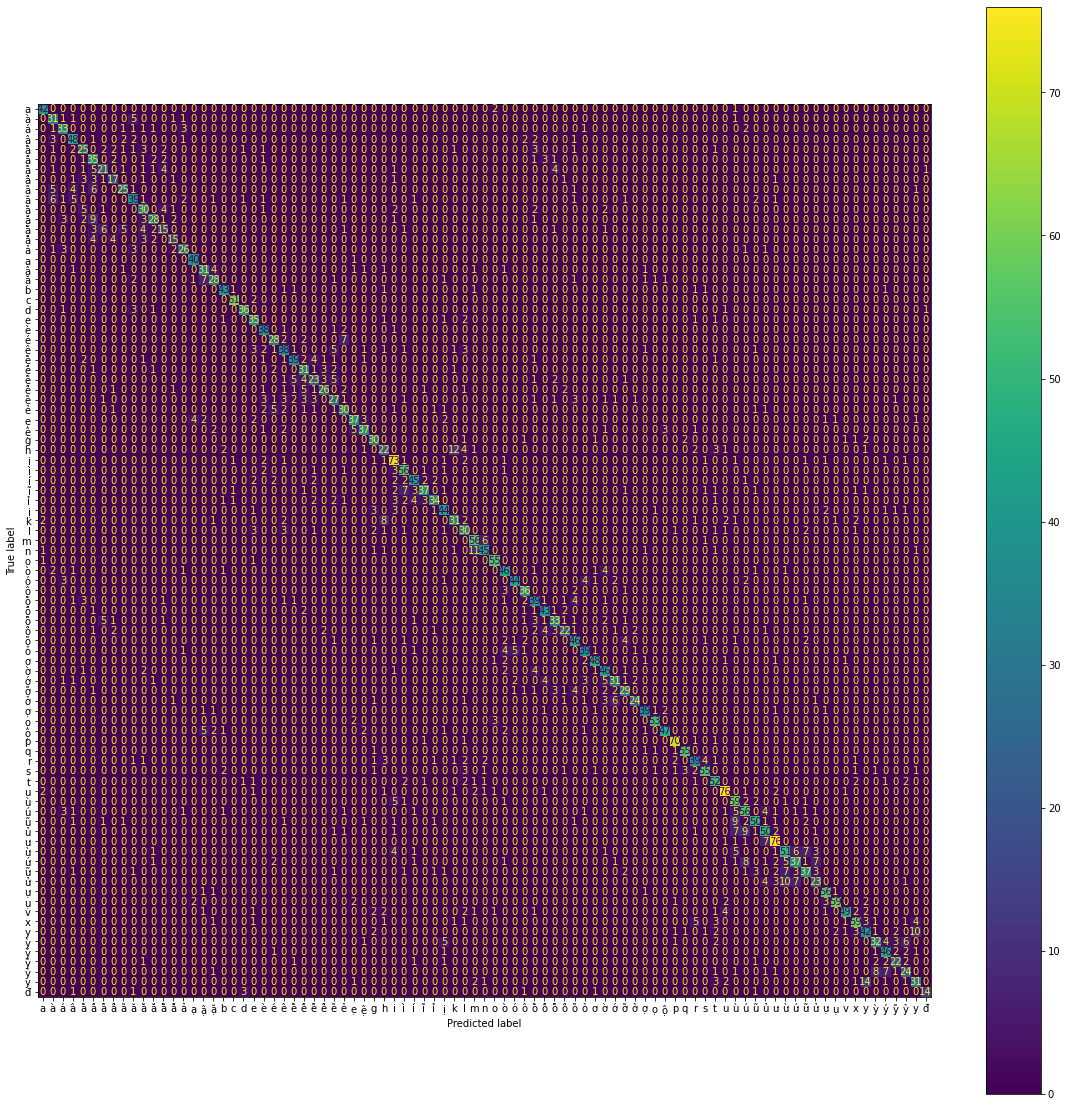

              precision    recall  f1-score   support

           a       0.88      0.93      0.90        45
          à       0.61      0.76      0.67        41
          á       0.67      0.75      0.71        44
          â       0.70      0.77      0.73        62
         ầ       0.57      0.53      0.55        47
         ấ       0.50      0.71      0.59        49
         ẫ       0.55      0.51      0.53        41
         ẩ       0.57      0.57      0.57        30
          ã       0.68      0.57      0.62        44
          ă       0.65      0.61      0.63        64
         ằ       0.57      0.62      0.59        48
         ắ       0.68      0.56      0.62        50
         ẵ       0.50      0.38      0.43        39
         ẳ       0.62      0.54      0.58        28
          ả       0.72      0.70      0.71        37
          ạ       0.85      0.98      0.91        41
         ậ       0.65      0.72      0.68        43
         ặ       0.67    

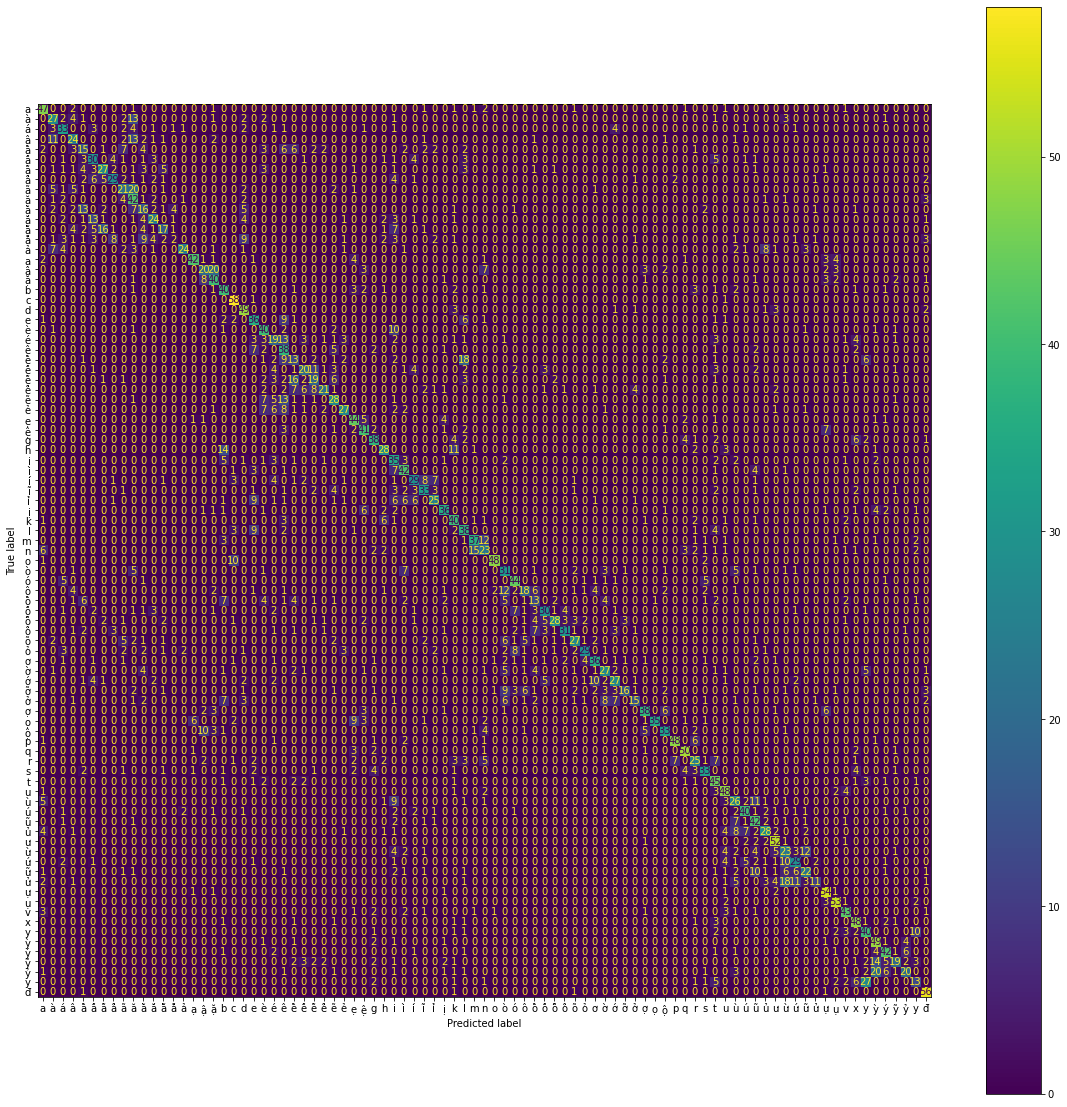

In [ ]:
y_pred_vali = model_SVM_poly.predict(X_vali)
y_pred_test = model_SVM_poly.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_poly,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_poly,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

> Sử dụng kernel rbf

In [ ]:
from sklearn.svm import SVC
model_SVM_rbf = SVC(C=1000, kernel = 'rbf', gamma=0.001)
model_SVM_rbf.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Lưu model
import joblib
filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_rbf.sav'
joblib.dump(model_SVM_rbf, filename)
#model_SVM_rbf = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_linear.sav')
#model_SVM_rbf

['/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_SVM_rbf.sav']

	Validation
Accuracy:  0.05140859551717047




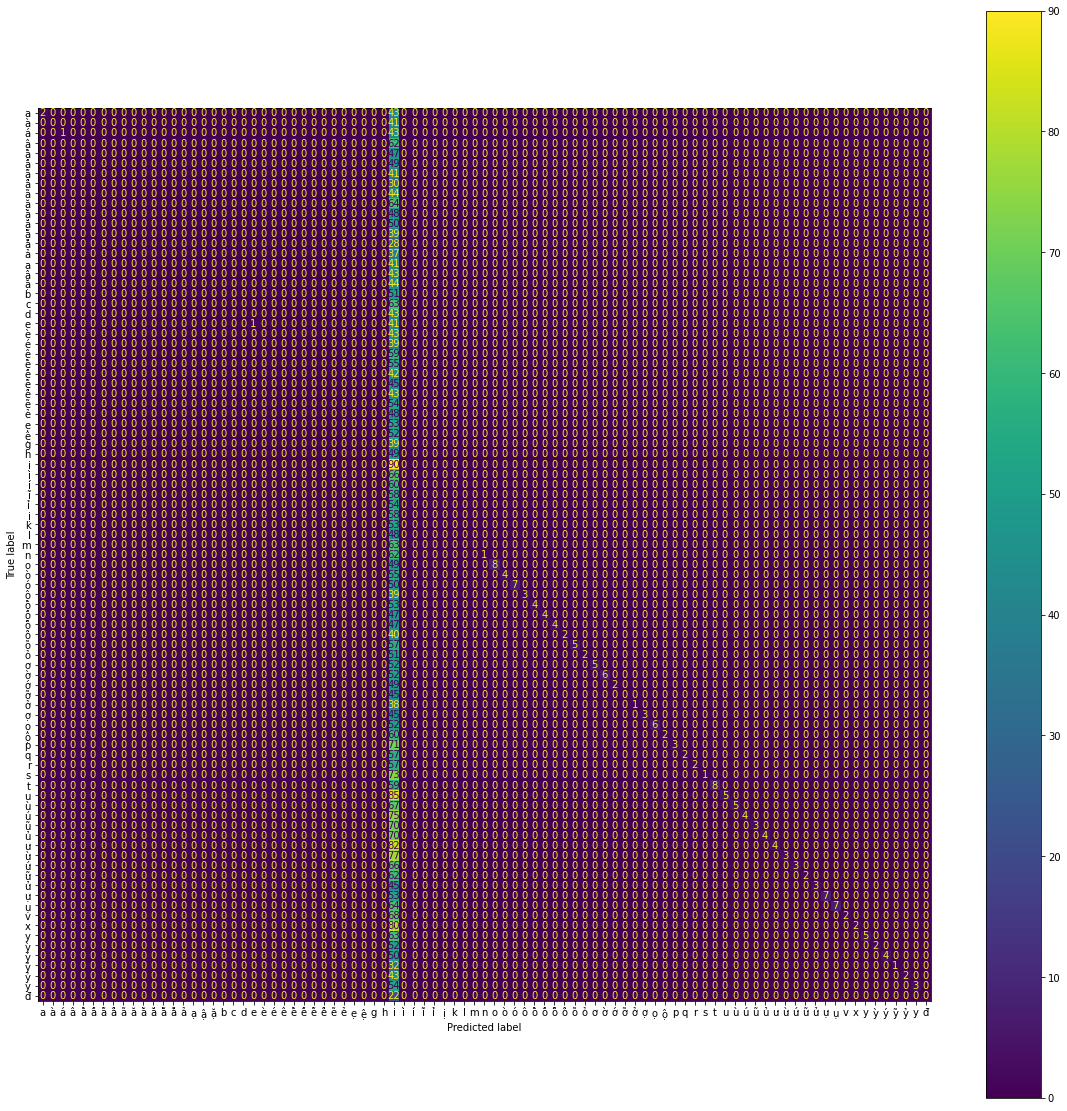

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           a       1.00      0.04      0.09        45
          à       0.00      0.00      0.00        41
          á       1.00      0.02      0.04        44
          â       0.00      0.00      0.00        62
         ầ       0.00      0.00      0.00        47
         ấ       0.00      0.00      0.00        49
         ẫ       0.00      0.00      0.00        41
         ẩ       0.00      0.00      0.00        30
          ã       0.00      0.00      0.00        44
          ă       0.00      0.00      0.00        64
         ằ       0.00      0.00      0.00        48
         ắ       0.00      0.00      0.00        50
         ẵ       0.00      0.00      0.00        39
         ẳ       0.00      0.00      0.00        28
          ả       0.00      0.00      0.00        37
          ạ       0.00      0.00      0.00        41
         ậ       0.00      0.00      0.00        43
         ặ       0.00    

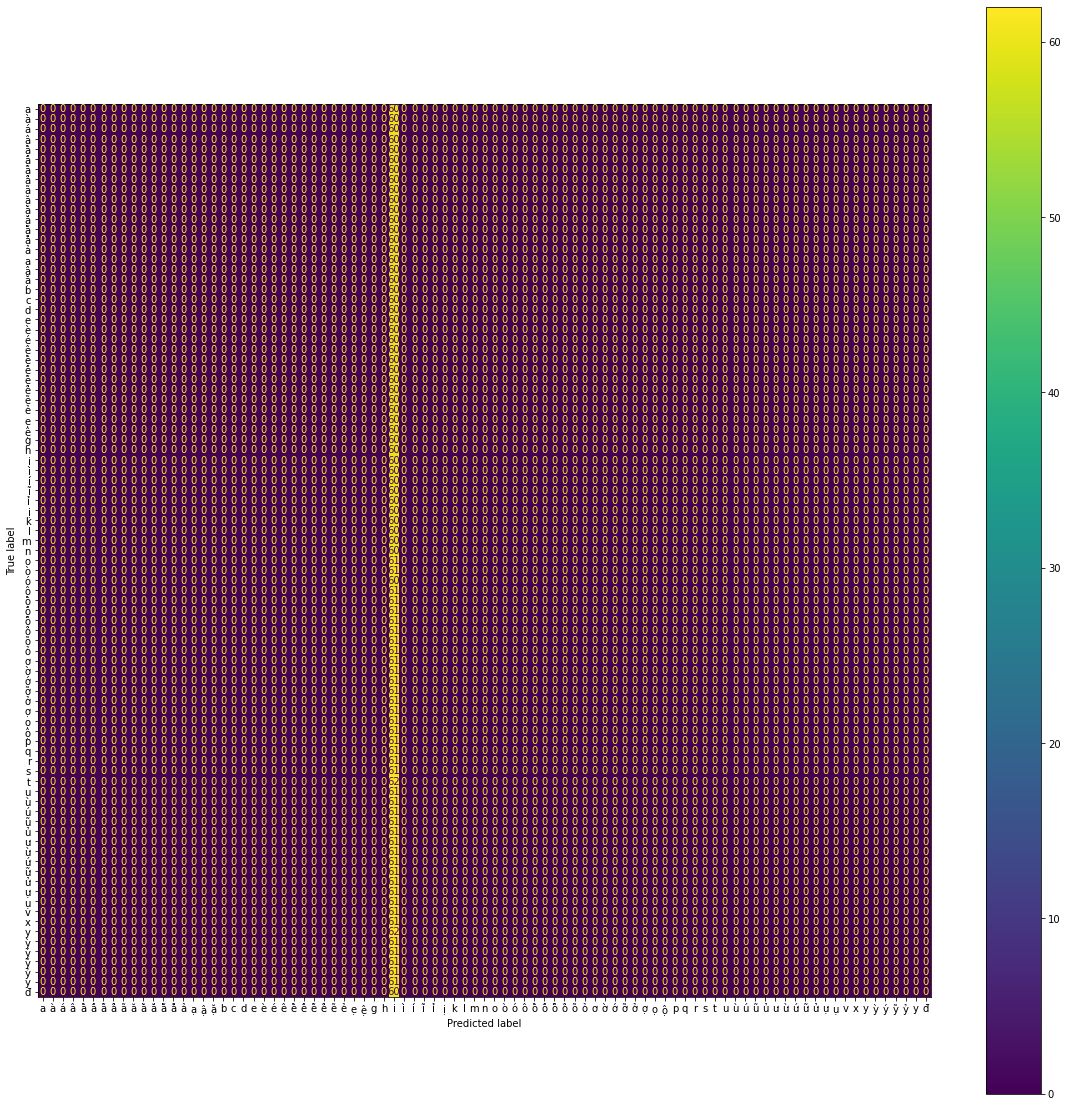

              precision    recall  f1-score   support

           a       0.00      0.00      0.00        60
          à       0.00      0.00      0.00        60
          á       0.00      0.00      0.00        60
          â       0.00      0.00      0.00        60
         ầ       0.00      0.00      0.00        60
         ấ       0.00      0.00      0.00        60
         ẫ       0.00      0.00      0.00        60
         ẩ       0.00      0.00      0.00        60
          ã       0.00      0.00      0.00        60
          ă       0.00      0.00      0.00        60
         ằ       0.00      0.00      0.00        60
         ắ       0.00      0.00      0.00        60
         ẵ       0.00      0.00      0.00        60
         ẳ       0.00      0.00      0.00        60
          ả       0.00      0.00      0.00        60
          ạ       0.00      0.00      0.00        60
         ậ       0.00      0.00      0.00        60
         ặ       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_vali = model_SVM_rbf.predict(X_vali)
y_pred_test = model_SVM_rbf.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_rbf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_rbf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

#**Model MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
Y_vali = Y_vali.ravel()
Y_train

array([ 0,  0,  0, ..., 88, 88, 88])

In [ ]:
model_MLP = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=500)
model_MLP.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 1000, 1000), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Lưu model
import joblib
filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_MLP.sav'
joblib.dump(model_MLP, filename)
#model_MLP = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_MLP.sav')
#model_MLP

['/content/drive/MyDrive/Data_Final_Project/Save_Model_FL/model_MLP.sav']

	Validation
Accuracy:  0.7285626156693399




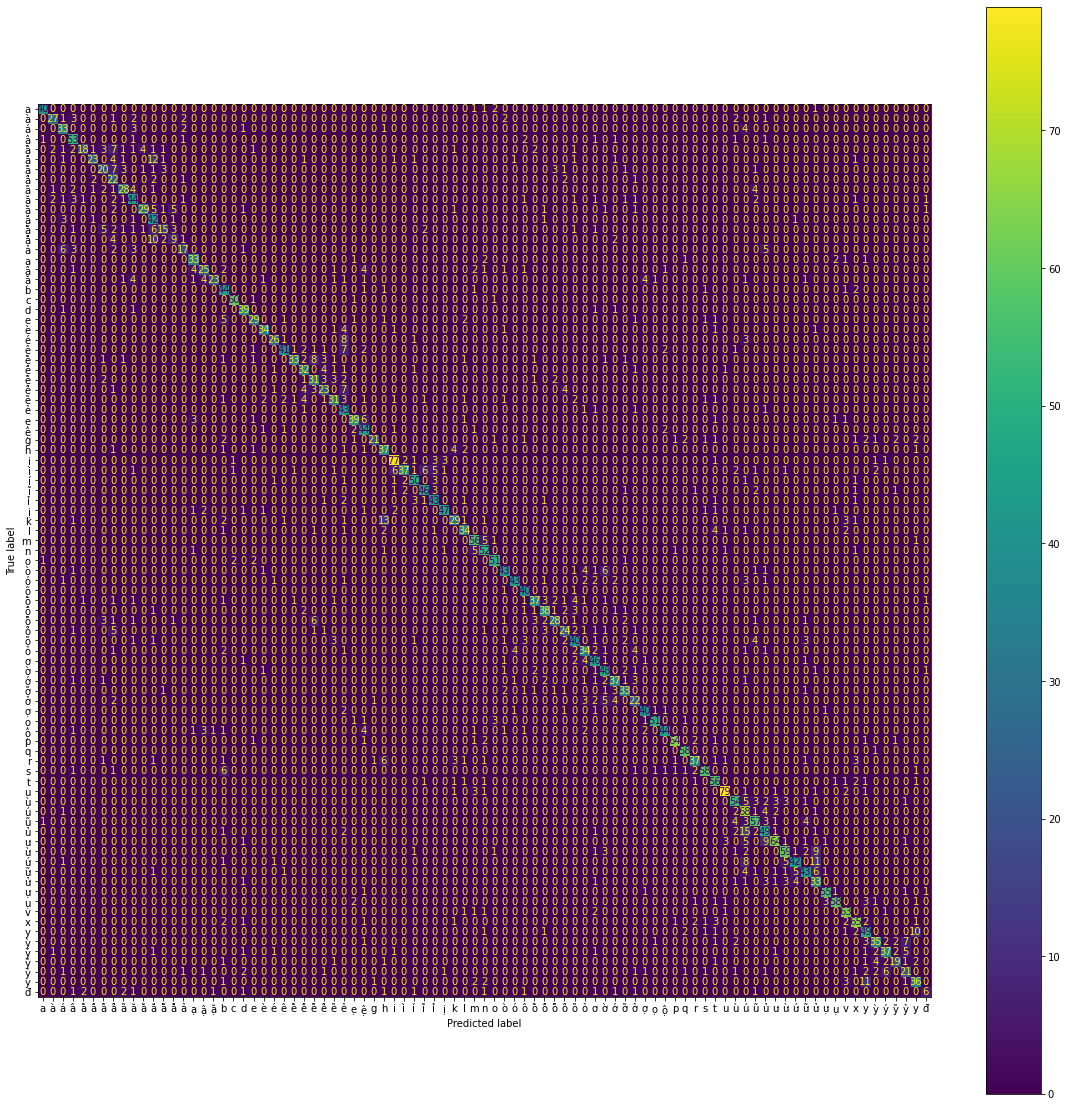

              precision    recall  f1-score   support

           a       0.93      0.89      0.91        45
          à       0.82      0.66      0.73        41
          á       0.65      0.75      0.69        44
          â       0.71      0.85      0.77        62
         ầ       0.82      0.38      0.52        47
         ấ       0.82      0.47      0.60        49
         ẫ       0.53      0.49      0.51        41
         ẩ       0.33      0.73      0.45        30
          ã       0.72      0.64      0.67        44
          ă       0.63      0.69      0.66        64
         ằ       0.83      0.60      0.70        48
         ắ       0.49      0.84      0.62        50
         ẵ       0.62      0.38      0.48        39
         ẳ       0.47      0.32      0.38        28
          ả       0.65      0.46      0.54        37
          ạ       0.75      0.80      0.78        41
         ậ       0.71      0.58      0.64        43
         ặ       0.92    

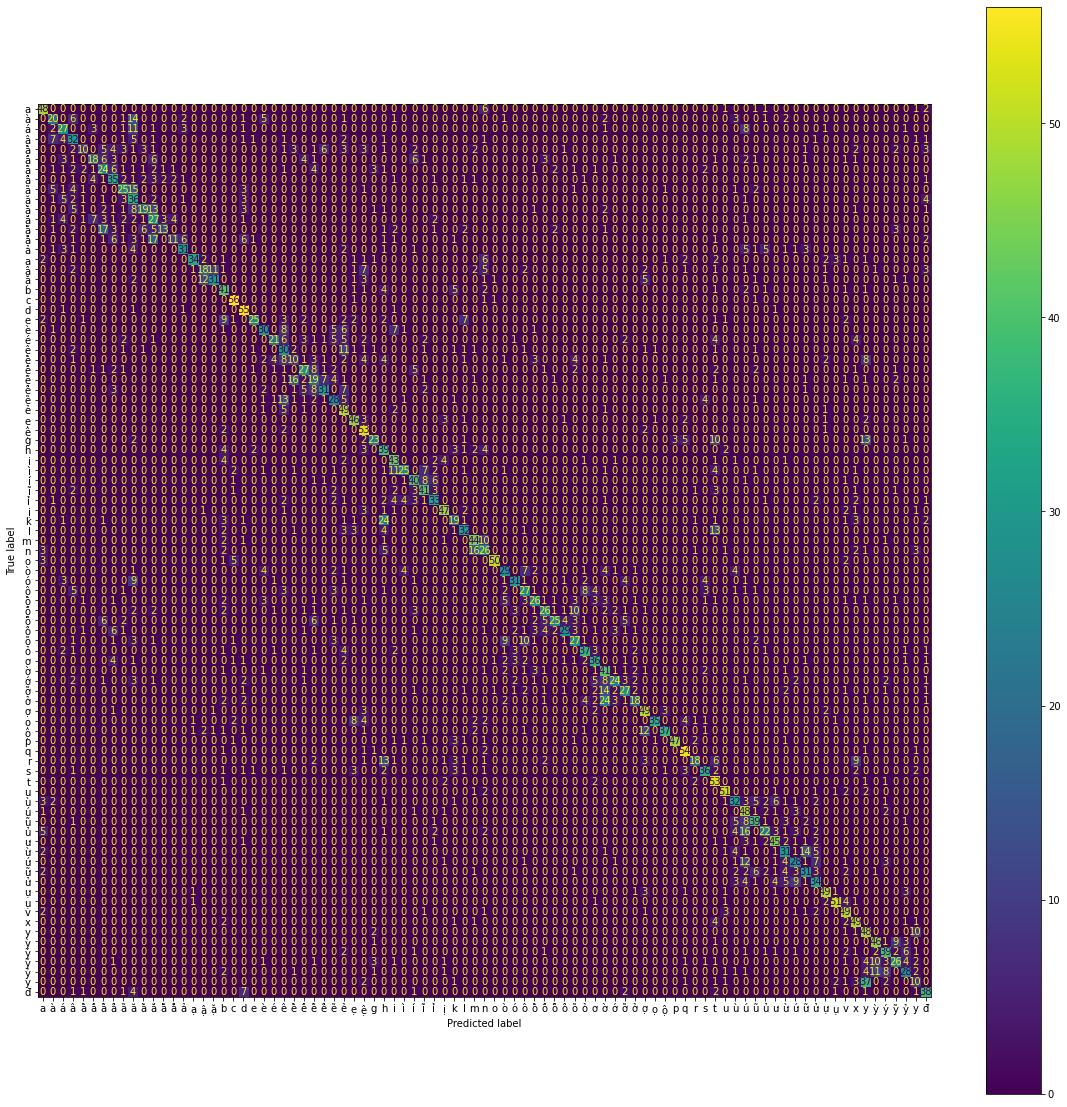

              precision    recall  f1-score   support

           a       0.66      0.80      0.72        60
          à       0.47      0.33      0.39        60
          á       0.49      0.45      0.47        60
          â       0.41      0.53      0.46        60
         ầ       0.50      0.17      0.25        60
         ấ       0.53      0.30      0.38        60
         ẫ       0.35      0.40      0.37        60
         ẩ       0.45      0.58      0.51        60
          ã       0.49      0.42      0.45        60
          ă       0.28      0.60      0.38        60
         ằ       0.56      0.32      0.40        60
         ắ       0.33      0.45      0.38        60
         ẵ       0.68      0.22      0.33        60
         ẳ       0.61      0.18      0.28        60
          ả       0.69      0.52      0.59        60
          ạ       0.87      0.57      0.69        60
         ậ       0.51      0.30      0.38        60
         ặ       0.70    

In [ ]:
y_pred_vali = model_MLP.predict(X_vali)
y_pred_test = model_MLP.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_MLP,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_MLP,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)
